# Imports

In [1]:
!pip install folium
!pip install geopandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# set style
sns.set(style='whitegrid', palette='pastel')
pd.set_option('display.max_colwidth', None)

In [ ]:
# importing and assigning simplified names
customers = pd.read_csv("olist_customers_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
payments = pd.read_csv("olist_order_payments_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
geolocation = pd.read_csv("olist_geolocation_dataset.csv")
product_translation = pd.read_csv("product_category_name_translation.csv")

# Initial EDA
printing heads of all datasets as well as dtypes, and numerical information

In [5]:
# heads
print("customers:")
print(customers.head().to_string())
print("\n-------------------------\norders:")
print(orders.head().to_string())
print("\n-------------------------\norder_items:")
print(order_items.head().to_string())
print("\n-------------------------\npayments:")
print(payments.head().to_string())
print("\n-------------------------\nreviews:")
print(reviews.head().to_string())
print("\n-------------------------\nproducts:")
print(products.head().to_string())
print("\n-------------------------\nsellers:")
print(sellers.head().to_string())
print("\n-------------------------\ngeolocation:")
print(geolocation.head().to_string())
print("\n-------------------------\nproduct_translation:")
print(product_translation.head().to_string())

customers:
                        customer_id                customer_unique_id  customer_zip_code_prefix          customer_city customer_state
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0                     14409                 franca             SP
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3                      9790  sao bernardo do campo             SP
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e                      1151              sao paulo             SP
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c                      8775        mogi das cruzes             SP
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066                     13056               campinas             SP

-------------------------
orders:
                           order_id                       customer_id order_status order_purchase_timestamp    order_approved_at order_delivered_carri

In [6]:
# info/dtypes
print("customers:")
print(customers.info())
print("\n-------------------------\norders:")
print(orders.info())
print("\n-------------------------\norder_items:")
print(order_items.info())
print("\n-------------------------\npayments:")
print(payments.info())
print("\n-------------------------\nreviews:")
print(reviews.info())
print("\n-------------------------\nproducts:")
print(products.info())
print("\n-------------------------\nsellers:")
print(sellers.info())
print("\n-------------------------\ngeolocation:")
print(geolocation.info())
print("\n-------------------------\nproduct_translation:")
print(product_translation.info())

customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

-------------------------
orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order

In [7]:
# describe/num cols info
print("customers:")
print(customers.describe().to_string())
print("\n-------------------------\norders:")
print(orders.describe().to_string())
print("\n-------------------------\norder_items:")
print(order_items.describe().to_string())
print("\n-------------------------\npayments:")
print(payments.describe().to_string())
print("\n-------------------------\nreviews:")
print(reviews.describe().to_string())
print("\n-------------------------\nproducts:")
print(products.describe().to_string())
print("\n-------------------------\nsellers:")
print(sellers.describe().to_string())
print("\n-------------------------\ngeolocation:")
print(geolocation.describe().to_string())
print("\n-------------------------\nproduct_translation:")
print(product_translation.describe().to_string())

customers:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

-------------------------
orders:
                                order_id                       customer_id order_status order_purchase_timestamp    order_approved_at order_delivered_carrier_date order_delivered_customer_date order_estimated_delivery_date
count                              99441                             99441        99441                    99441                99281                        97658                         96476                         99441
unique                             99441                             99441            8                    98875                90733                        81018                         95664                           4

In [8]:
# full duplicate rows
for name, df_ in zip(
    ['customers', 'orders', 'order_items', 'payments', 'reviews', 'products', 'sellers', 'geolocation'],
    [customers, orders, order_items, payments, reviews, products, sellers, geolocation]):
    print(f"\n{df_.shape[0]}")
    print(f"{name}: {df_.value_counts().sum()} unique rows")
    print(f"{name}: {df_.duplicated().sum()} duplicate rows")
    print(f"{name} null values:")
    print(df_.isnull().sum())


# check duplicate IDs
print(f"\nUnique ids {customers['customer_unique_id'].duplicated().sum()}")
print(f"ids: {customers['customer_id'].duplicated().sum()}")
print(f"order_ids: {orders['order_id'].duplicated().sum()}")        # Should be 0
print(f"product_ids: {products['product_id'].duplicated().sum()}")    # Should be 0
print(f"seller_ids: {sellers['seller_id'].duplicated().sum()}")      # Should be 0



99441
customers: 99441 unique rows
customers: 0 duplicate rows
customers null values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

99441
orders: 96461 unique rows
orders: 0 duplicate rows
orders null values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

112650
order_items: 112650 unique rows
order_items: 0 duplicate rows
order_items null values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

103886
payments: 103886 unique rows
payments: 0 duplicate rows
payments

# Dataset Pairplots
To visualize and explore potential trends or patterns in data

<Figure size 800x600 with 0 Axes>

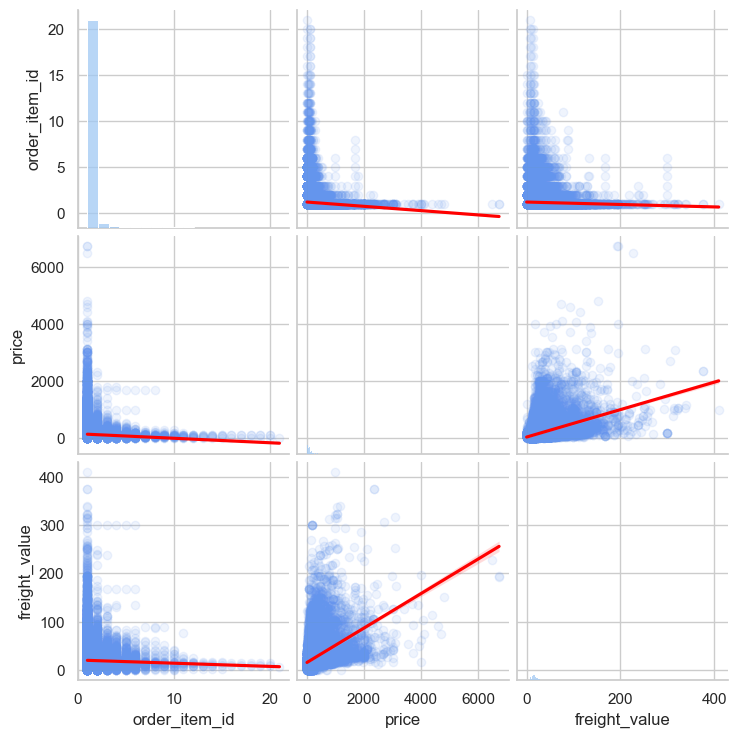

In [9]:
# order_items
plt.figure(figsize=(8, 6))
sns.pairplot(order_items, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 'color':'cornflowerblue'}})
plt.show()

<Figure size 800x600 with 0 Axes>

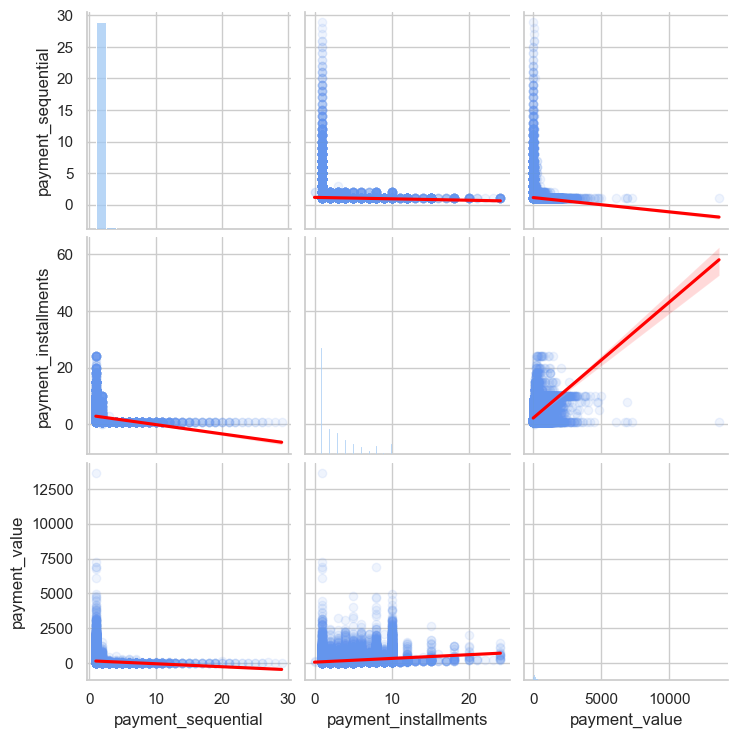

In [10]:
# payments
plt.figure(figsize=(8, 6))
sns.pairplot(payments, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 'color':'cornflowerblue'}})
plt.show()

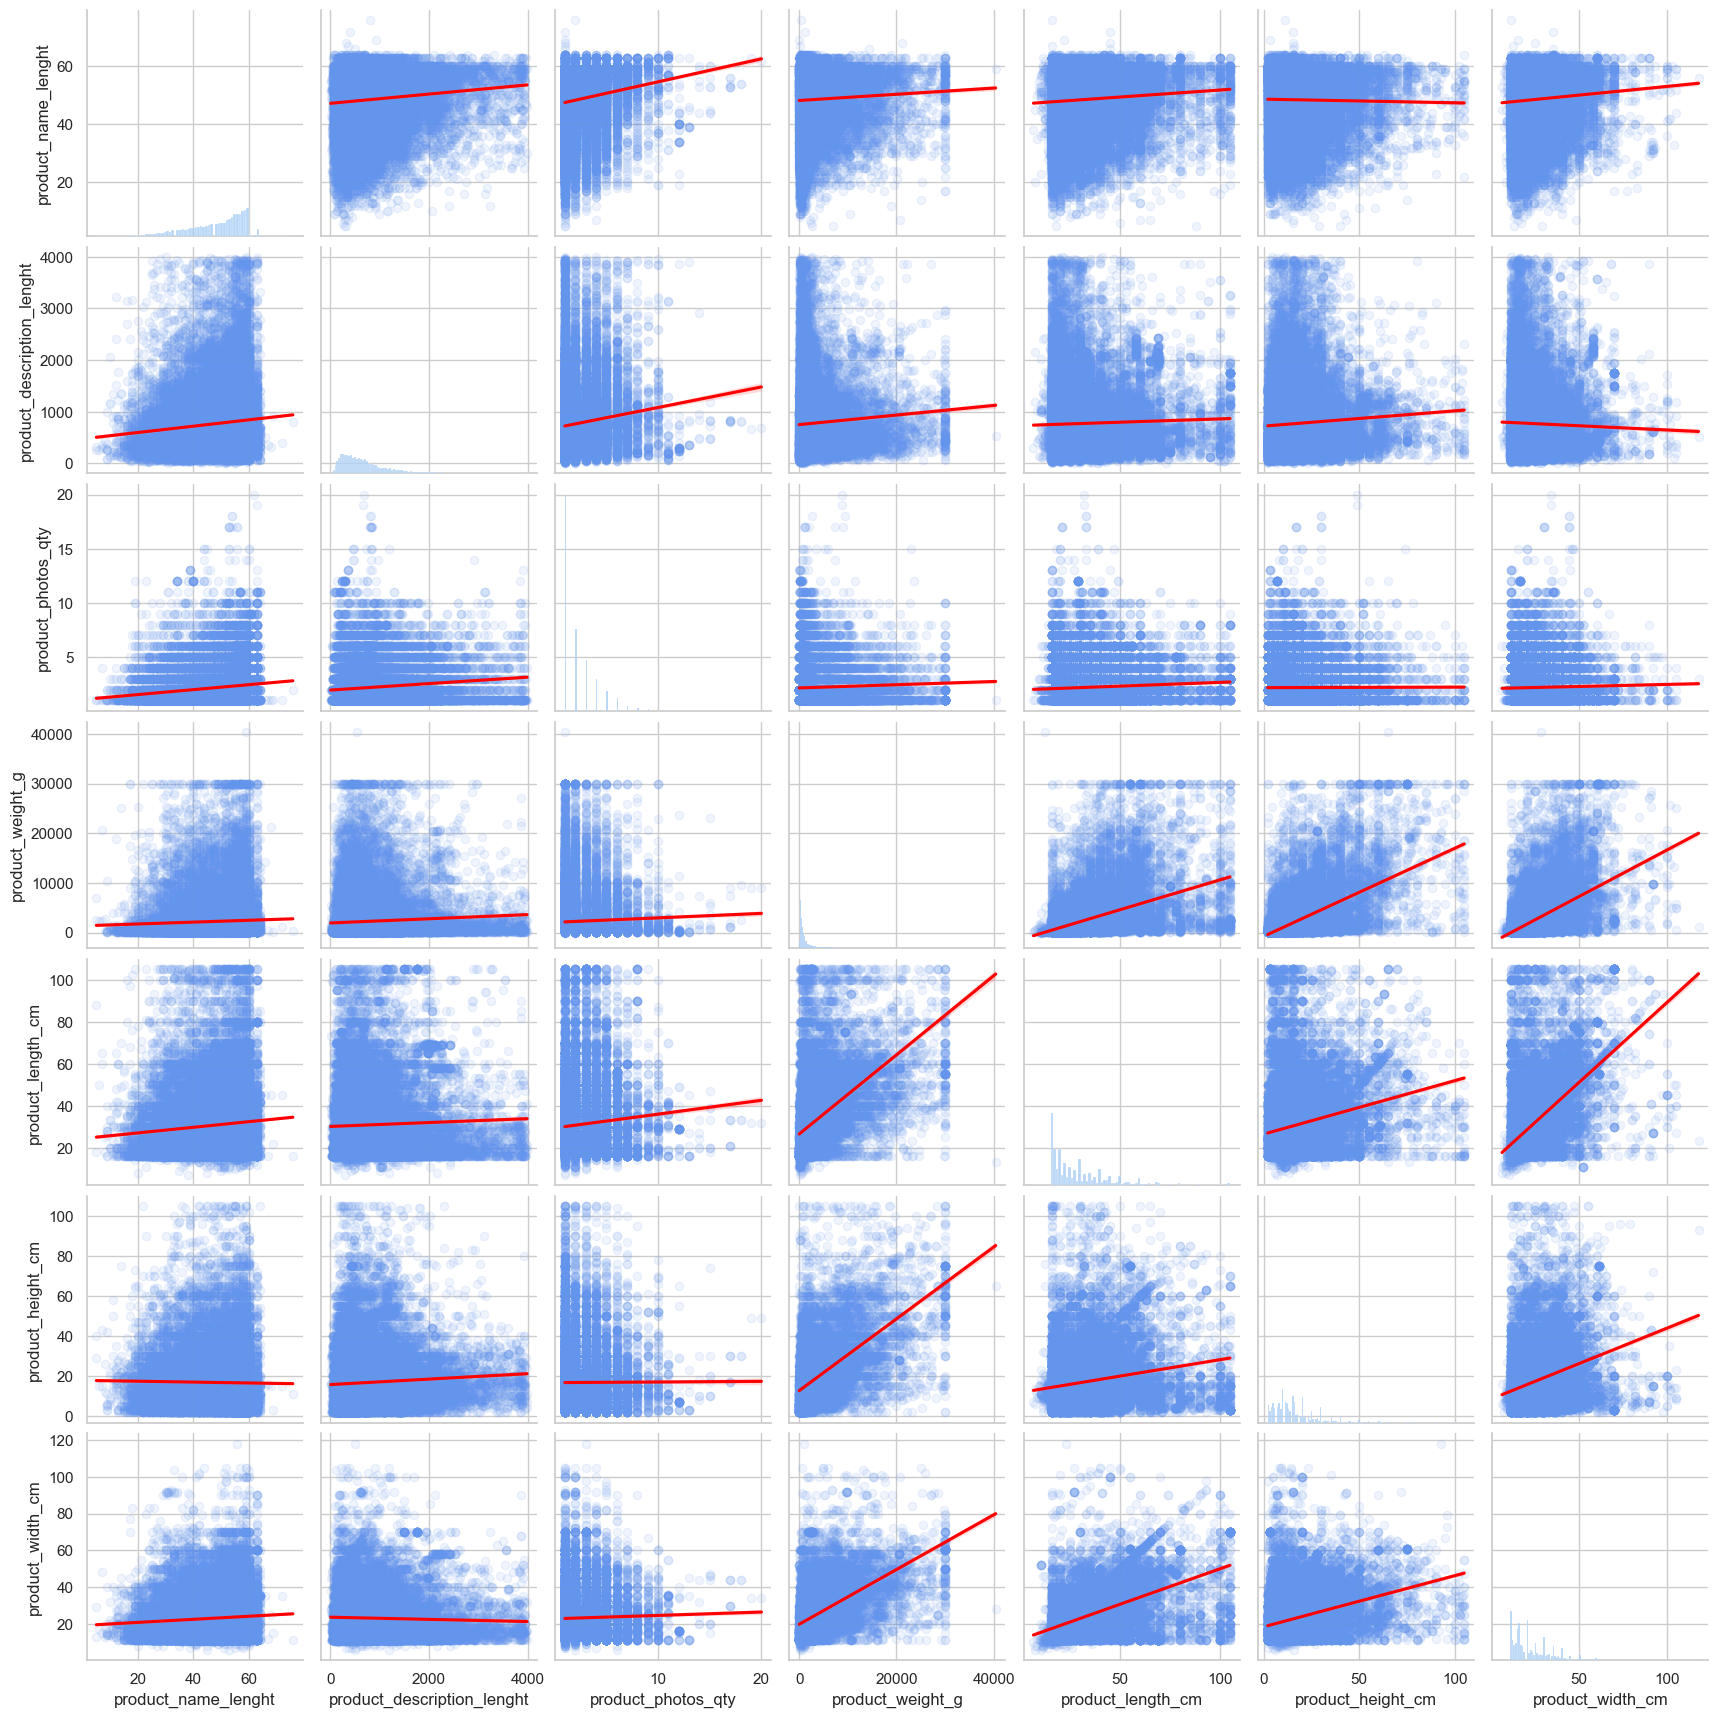

In [11]:
# products
sns.pairplot(products, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1, 'color':'cornflowerblue'}})
plt.show()

<Figure size 800x600 with 0 Axes>

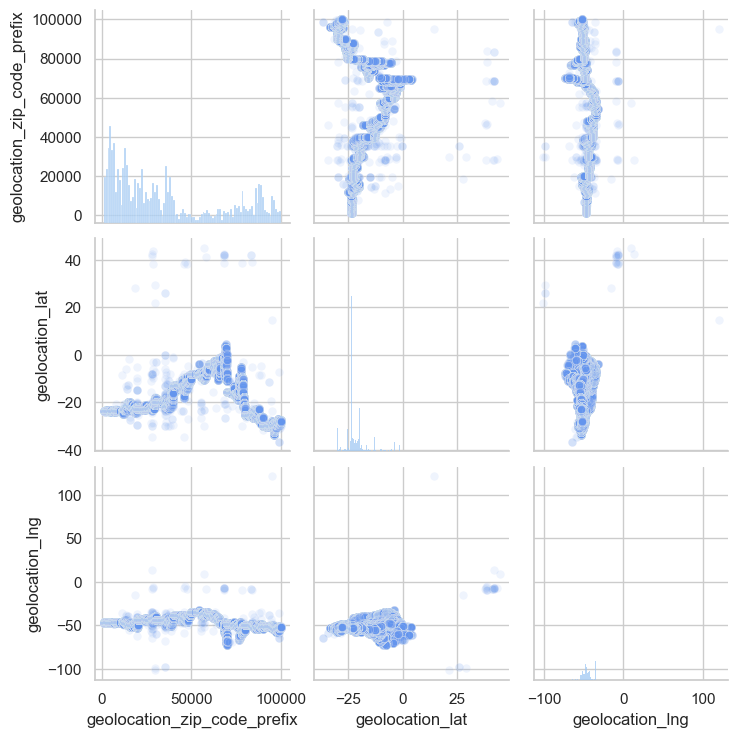

In [12]:
# geolocation
plt.figure(figsize=(8, 6))
sns.pairplot(geolocation, kind='scatter', plot_kws={'alpha': 0.1, 'color':'cornflowerblue'})
plt.show()

# Continued EDA and Visualizations
Going further than just surface data